In [21]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By



In [11]:

## Linkedin ID and PASSWORD
email = "email@mail.com"
password = "senhaficticia"

## Write here the job position and local for search
position = "data analyst"
local = "brazil"

##example below: 
## position = "data scientist"
## local = "brazil"

## formating to linkedin model
position = position.replace(' ', "%20")

In [12]:
driver_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
#Maximizing browser window to avoid hidden elements
driver.set_window_size(1024, 600)
driver.maximize_window()## Opening linkedin website
driver.get('https://www.linkedin.com/login')
## waiting load
time.sleep(2)
driver.find_element(By.ID,"username").send_keys(email)
driver.find_element(By.ID,"password").send_keys(password)
driver.find_element(By.ID,"password").send_keys(Keys.RETURN)
# Opening jobs 
driver.get(f"https://www.linkedin.com/jobs/search/?currentJobId=2662929045&geoId=106057199&keywords={position}&location={local}")
# waiting 
time.sleep(10)
disc_list = []
for i in range(1, 2):
    driver.find_element(By.XPATH, f"//button[@aria-label='Página {i}']").click()
    time.sleep(3)
    jobs_list = driver.find_element(By.CLASS_NAME, "scaffold-layout__list-container")
    jobs = jobs_list.find_elements(By.CLASS_NAME, 'scaffold-layout__list-item')
    time.sleep(3)
    for job in range(1, len(jobs)+1):
        # job click
        driver.find_element(By.XPATH, f'/html/body/div[5]/div[3]/div[4]/div/div/main/div/section[1]/div/ul/li[{job}]').click()
        time.sleep(2)
        driver.find_element(By.XPATH, f'/html/body/div[5]/div[3]/div[4]/div/div/main/div/section[1]/div/ul/li[{job}]/div/div[1]/div[1]/div[2]/div[1]/a').click()
        # waiting load
        time.sleep(2)
        # select job description
        job_desc = driver.find_element(By.ID, 'job-details')
        # get text
        soup = BeautifulSoup(job_desc.get_attribute(
            'outerHTML'), 'html.parser')
        # add text to list
        disc_list.append(soup.text)
    



C:\Users\User\AppData\Local\Temp\ipykernel_16792\3432105575.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [15]:
df = pd.DataFrame(disc_list)
df = df.replace(['\n',
                 '^.*?Expect', 
                 '^.*?Qualifications', 
                 '^.*?Required', 
                 '^.*?expected', 
                 '^.*?Responsibilities', 
                 '^.*?Requisitos', 
                 '^.*?Requirements', 
                 '^.*?Qualificações', 
                 '^.*?QualificationsRequired1', 
                 '^.*?você deve ter:', 
                 '^.*?experiência', 
                 '^.*?você:', 
                 '^.*?Desejável', 
                 '^.*?great', 
                 '^.*?Looking For', 
                 '^.*?ll Need', 
                 '^.*?Conhecimento', 
                 '^.*?se:',
                 '^.*?habilidades',                 
                 '^.*?se:',
                 '^.*?REQUISITOS'
                 ], '', regex=True)

In [16]:
df

,0
0,About AgodaAgoda is an online travel booking ...
1,Job DescriptionAssist the ombudsman’s team wi...
2,"Quem Somos:A Marketdata, empresa do grupo VML..."
3,Responsibilities TikTok is the leading destin...
4,"Sobre o banco BVUm banco nacional, o 5º maior..."
5,Crossover is the world's #1...
6,Love sports?Do you speak English?We're lookin...
7,Responsibilities TikTok is the leading destin...
8,"Se você gosta de se conectar com as pessoas, ..."
9,About The TeamThe Data & Analytics team plays...


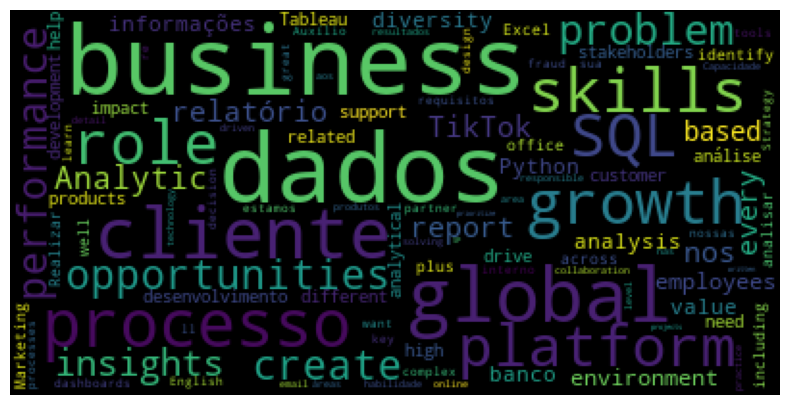

In [26]:
## setup wordcloud
stopwords = set(STOPWORDS)
## selecting useless words 
badwords = {'gender', 'experience', 'application', 'Apply', 'salary', 'todos', 'os', 'company', 'identity', 'sexual', 'orientation',
          'de', 'orientação', 'sexual', 'gênero', 'committed', 'toda','client', 'conhecimento',
          'world', 'year', 'save','São', 'Paulo', 'information', 'e', 'orientação', 'sexual', 'equal', 'oppotunity', 'ambiente', 'will',
          'Experiência', 'national origin','todas', 'work', 'de', 'da', 'years', 'pessoa', 'clients', 'Plano', 'creating',
          'employer', 'saúde','em', 'working', 'pessoas', 'mais', 'data', 'people', 'dia', 'one', 'knowledges', 'plataforma',
          'ou', 'benefício', 'para', 'software', 'opportunity', 'tecnologia', 'você', 'mais', 'solution', 'national', 'origin',
          'trabalhar', 'option', 'negócio', 'empresa', 'o', 'sicence', 'team', 'é', 'veteran', 'status', 'etc', 'raça', 'cor', 'belive',
          'nossa', 'uma', 'como', 'Scientist', 'ferramenta', 'projeto', 'que', 'job', 'benefícios', 'knowledge', 'toll', 's', 'modelo',
          'desconto', 'cultura', 'serviço', 'time', 'se', 'solutions', 'mercado', 'das', 'somos', 'problema', 'mundo', 'race', 'color',
          'vaga', 'pelo', 'ser', 'show', 'Seguro', 'Se', 'um', 'Um', 'tool', 'regard', 'without', 'make', 'ao', 'técnica', 'life',
          'interested', 'diversidade', 'proud', 'ability', 'sobre', 'options', 'using', 'área', 'nosso', 'na', 'seu', 'product', 'produto',
          'building', 'skill', 'model', 'religion', 'Share', 'receive', 'consideration', 'Aqui', 'vida', 'ferramentas', 'Vale', 'Refeição',
          'Strong', 'Pay', 'range', 'available', 'part', 'trabalho', 'Alimentação', 'employment', 'qualified', 'applicants', 'gympass',
          'está', 'comprometida', 'forma', 'Transporte', 'Yes', 'gente', 'melhor', 'lugar', 'believe', 'moment', 'próximo','deasafio',
          'dos', 'oportunidade', 'idade', 'new', 'Try', 'Premium', 'deficiência', 'sempre', 'criar', 'employee', 'problemas', 'unavailable',
          'Brasil', 'dado', 'hiring', 'trends', 'equipe', 'recent', 'temos', 'build', 'career', 'nós', 'diferencial', 'ma',
           'total', 'oferecemos', 'contato', 'tem', 'não', 'free', 'Full','nossos','à','day','us','por'}

## deleting the useless words on plot
stopwords.update(badwords)

## plot parameters
wordcloud = WordCloud(background_color='black', 
                      stopwords=stopwords, 
                      max_words=100, 
                      max_font_size=50, 
                      random_state=42).generate("".join(df[0]))

## Plot
print(wordcloud) 
plt.figure(figsize=(10,5)) 
fig = plt.figure(1) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


## exporting our dataframe to a csv file
df.to_csv('wordcloud-job.csv', sep=';')
                      